In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from blimpy import Waterfall
import sys
sys.path.insert(1, '../GBT_pipeline')
sys.path.insert(2, '../ML_Training')
from preprocess_dynamic import resize_par

In [63]:
dir = 'HIP50583_directory_5.csv'
file = 'HIP50583_0.csv'

df = pd.read_csv('../GBT_pipeline/result/'+file)

df_filtered = df.loc[df['probability'] >0.90]
df_filtered

,Unnamed: 0,start_freq,end_freq,probability,index
63,63,1926.134491,1926.145935,0.901,31572.0
88,88,2107.099915,2107.111359,0.958,2550.0
127,127,2193.548584,2193.560028,0.903,23082.0
152,152,2320.246124,2320.257568,0.932,22512.0
166,166,2416.193390,2416.204834,0.947,5136.0


2320.246124267578 2320.257568359375
(6, 16, 1, 4096) (6, 16, 1, 512)


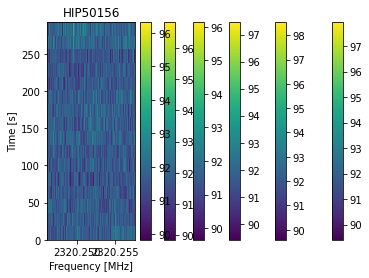

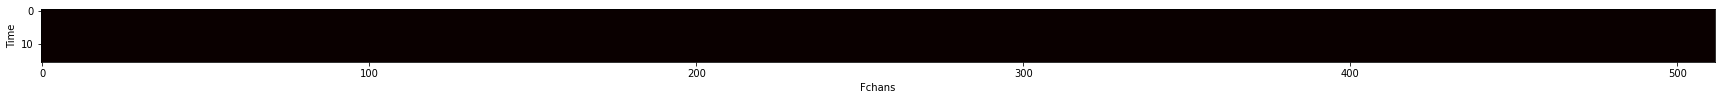

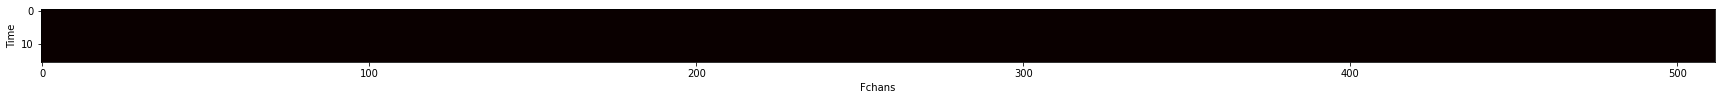

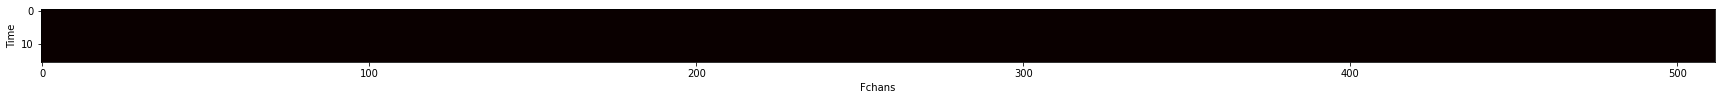

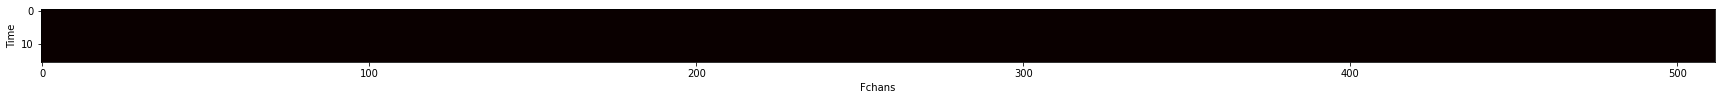

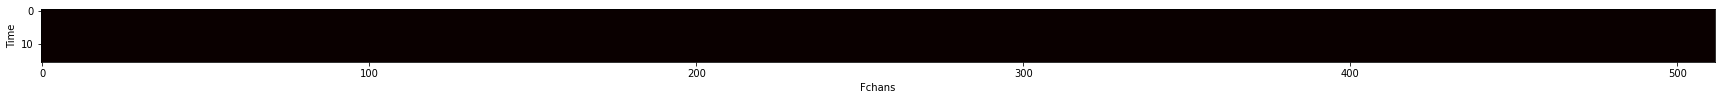

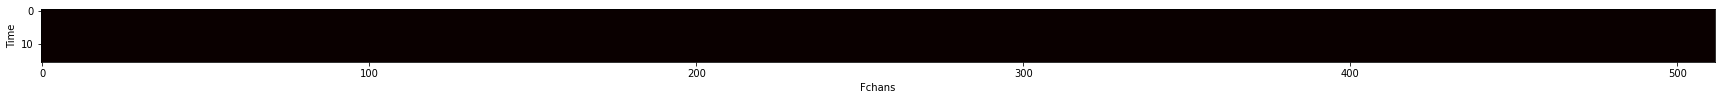

In [65]:
%matplotlib inline

val = df_filtered.sample().values.tolist()
f_start, f_stop = val[0][1], val[0][2]
print(f_start,f_stop)

cad =pd.read_csv('../GBT_pipeline/result/'+dir)
name = cad['0'].tolist()

loaded_data = np.zeros((6,16,1,4096))

for i in range(6):
    loaded_data[i,:,:,:] =  Waterfall(name[i],f_start=f_start, f_stop=f_stop).data

resize = resize_par(loaded_data, factor=8)
for i in range(6):
    plt.figure(figsize=(30, 20))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(resize[i,:,0,:] , interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()